# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

The objective of this experiment is to apply t-sne on swiss roll dataset.

#### Keywords

* Manifold
* Swiss roll
* Non - linear Dimensionality reduction
* Geo desic distance
* Local structure

#### The expected time to complete the experiment is 30 mins

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P19A06E_test" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "981234567" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="BLR_M2W9_SUN_DL_3" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
   
   print ("Setup completed successfully")
   return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "id" : Id, "file_hash" : file_hash, "notebook" : notebook}

      r = requests.post(url, data = data)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", datetime.datetime.now().date().strftime("%d %b %Y"))
      print("Time of submission: ", datetime.datetime.now().time().strftime("%H:%M:%S"))
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### we will be generating the Swiss roll data as we have done in part 0

In [0]:
### importing the required packages
from sklearn.datasets import *
from sklearn import manifold
import matplotlib.pyplot as plt
import numpy as np

#### Generating the data

In [0]:
n_samples = 1500
X, color = make_swiss_roll(n_samples)

#### Applying t-SNE on the data

In [0]:
tsne_data = manifold.TSNE(n_components=2).fit_transform(X)

#### Let us plot the data

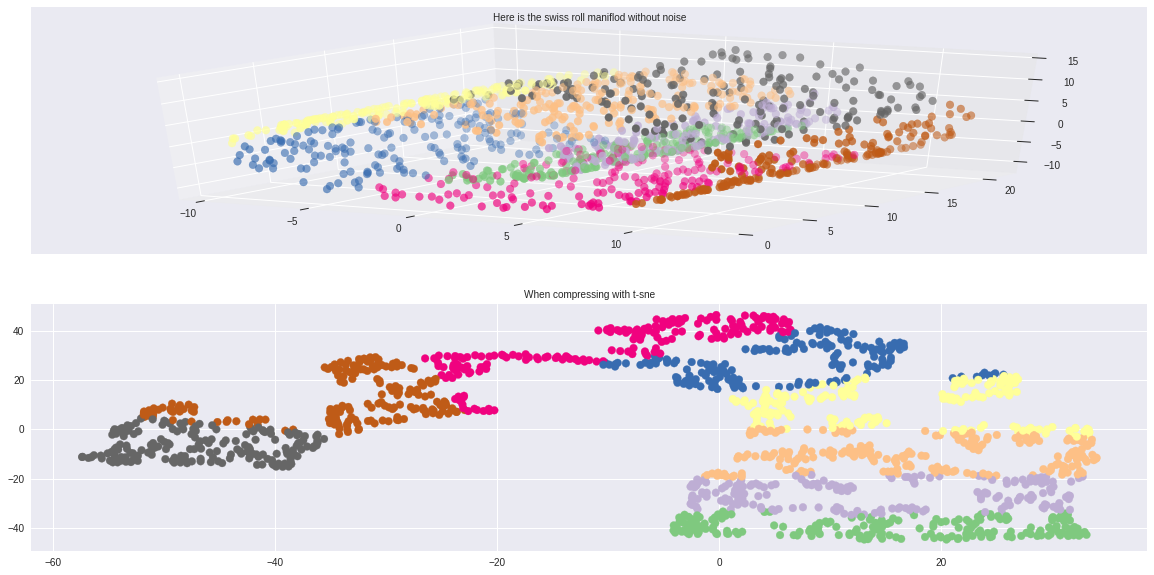

In [7]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod without noise', fontsize=10)
ax.scatter(X[:,0],X[:,1],X[:,2],c = color,cmap="Accent",s=60)
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with t-sne', fontsize=10)
ax.scatter(tsne_data[:,0],tsne_data[:,1],c = color,cmap="Accent",s=60)

#### Now let us generate swiss roll data for 300 samples with some noise in it

In [0]:
noise = 0.01*200 
n_samples = 300
ndata,colors = make_swiss_roll(n_samples,noise)

#### Lets concatenate the noise data values and original data values

In [0]:
import numpy as np
con_data =  np.concatenate((X, ndata), axis=0)
con_colors = np.concatenate((color,colors),axis=0)

In [0]:
##applying tsne on the data
tsne_data = manifold.TSNE(n_components=2).fit_transform(con_data)

#### Let us plot the data

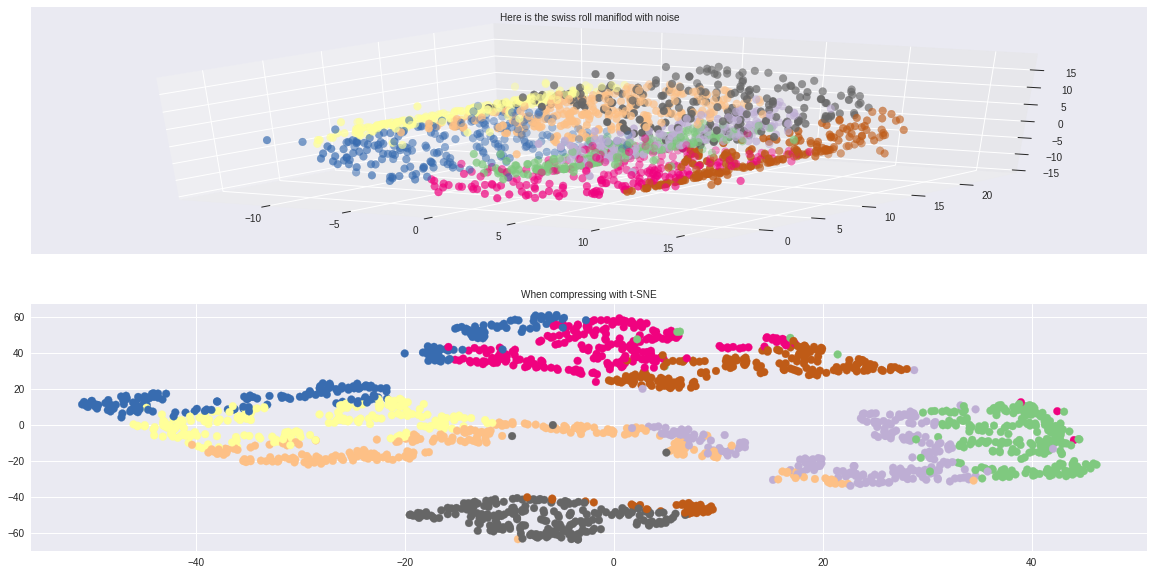

In [11]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod with noise', fontsize=10)
ax.scatter(con_data[:,0],con_data[:,1],con_data[:,2],c = con_colors,cmap="Accent",s=60)
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with t-SNE', fontsize=10)
ax.scatter(tsne_data[:,0],tsne_data[:,1],c = con_colors,cmap="Accent",s=60)

#### Summary:

t-SNE to be particularly sensitive to local structure, revealing data that lie in multiple, different, manifolds or clusters and reduces the tendency to crowd points together at the center." Notice that it is very robust to noise and other distortions, and hence is widely used for visualization purposes.

### Please answer the questions below to complete the experiment:




In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Test" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [0]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 7025
Date of submission:  21 Dec 2018
Time of submission:  04:48:46
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
